# Introdução análise espacial com Python

Neste tutorial vamos usar [geopandas](https://pypi.org/project/geopandas/) para carregar layer espacial, [fiona](https://pypi.org/project/Fiona/) para identificar as layers existentes, [matplotlib](https://matplotlib.org/) para 'plotar' a layer carregada (apresentação visual em forma de "mapa").
Os dados são provenientes do mapeamento sistemático do [IBGE - "BCIM 2016 em formato geopackage"](https://www.ibge.gov.br/geociencias-novoportal/cartas-e-mapas/bases-cartograficas-continuas/15759-brasil.html?=&t=downloads)

**Passos a serem executados:**
1. Carregar bibliotecas;
1. Identificar layers do Geopackage (mapeamento do IBGE 1:1000000);
1. Carregar layer;
1. Visualizar layer carregada;
1. Conversão de coordenadas;
1. Gerar um buffer;

## 1. Carregando bibliotecas

In [11]:
import geopandas as gpds
%matplotlib inline
import fiona

## 2. Identificando layers do Gepackage

In [12]:
fiona.listlayers("./bcim_2016_11_03.gpkg")

['hid_massa_dagua_a',
 'hid_trecho_massa_dagua_a',
 'hid_barragem_l',
 'hid_barragem_p',
 'hid_trecho_drenagem_l',
 'hid_sumidouro_vertedouro_p',
 'lim_outros_limites_oficiais_l',
 'lim_pais_a',
 'lim_municipio_a',
 'lim_unidade_federacao_a',
 'hid_queda_dagua_l',
 'lim_unidade_uso_sustentavel_a',
 'lim_unidade_conservacao_nao_snuc_a',
 'lim_unidade_protecao_integral_a',
 'lim_area_desenvolvimento_controle_a',
 'lim_terra_indigena_a',
 'lim_terra_indigena_p',
 'hid_corredeira_l',
 'hid_corredeira_p',
 'hid_ilha_a',
 'hid_rocha_em_agua_a',
 'adm_edif_pub_militar_a',
 'adm_edif_pub_militar_p',
 'adm_posto_fiscal_p',
 'hid_banco_areia_a',
 'hid_recife_a',
 'hid_terreno_sujeito_inundacao_a',
 'rel_curva_batimetrica_l',
 'rel_curva_nivel_l',
 'rel_ponto_cotado_batimetrico_p',
 'rel_elemento_fisiografico_natural_l',
 'rel_elemento_fisiografico_natural_p',
 'rel_ponto_cotado_altimetrico_p',
 'rel_duna_a',
 'rel_pico_p',
 'veg_mangue_a',
 'veg_brejo_pantano_a',
 'veg_veg_restinga_a',
 'tra_tra

## 3. Carregando layer

In [14]:
Estados = gpds.read_file("./bcim_2016_11_03.gpkg", layer = "lim_unidade_federacao_a")
Estados.head()

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,geometry
0,Goiás,,Sim,GO,52,(POLYGON ((-50.15876477687289 -12.415812044190...
1,Mato Grosso,,Sim,MT,51,(POLYGON ((-60.10040697817874 -12.912708943845...
2,Mato Grosso do Sul,,Sim,MS,50,(POLYGON ((-56.09815327835105 -17.172196303916...
3,Rio Grande do Sul,,Sim,RS,43,(POLYGON ((-53.03425191679247 -27.154553165496...
4,Paraná,,Sim,PR,41,(POLYGON ((-52.0809035547552 -22.5289329222165...


## 4. Visualizando layer carregada

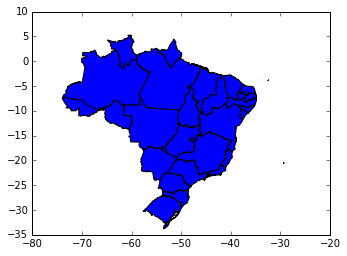

In [15]:
Estados.plot()

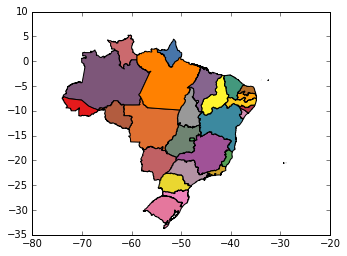

In [16]:
Estados.plot(column = "sigla")

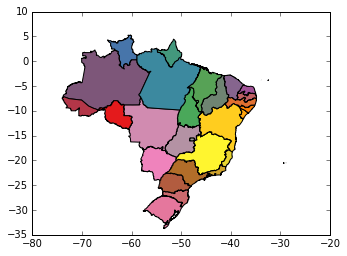

In [17]:
Estados.plot(column = "geocodigo")

## 5. Conversão de coordenadas

In [18]:
EstadosAlbers = Estados.to_crs("+proj=aea +lat_1=-5 +lat_2=-42 +lat_0=-32 +lon_0=-60 +x_0=0 +y_0=0 +ellps=aust_SA +units=m +no_defs")

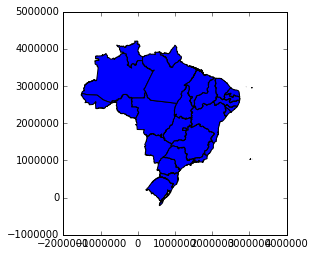

In [19]:
EstadosAlbers.plot()

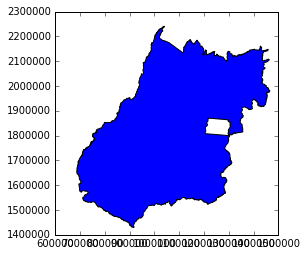

In [20]:
EstadosAlbers[0:1].plot()

## 6. Gerando um buffer

In [21]:
GO = EstadosAlbers[0:1]

In [23]:
GO[:]["geometry"] = GO.buffer(100000)
GO.head()

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,geometry
0,Goiás,,Sim,GO,52,"POLYGON ((485842.7699637936 1675286.84426624, ..."


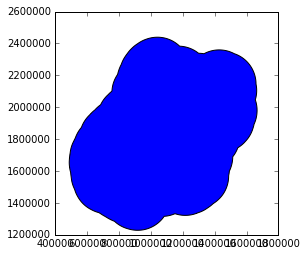

In [24]:
GO.plot()

# Alguns links importantes:

* [Como instalar jupyter-notebook](https://goo.gl/4GMSqL)
* [Repositório grupo de estudos em python](https://github.com/hugonbg/grupo_de_estudos_python)
* [Color maps](https://matplotlib.org/users/colormaps.html)